<a href="https://colab.research.google.com/github/realpranav93/EVA-projects/blob/master/session5/assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title
# https://keras.io/
!pip install -q keras
import keras

In [0]:
#@title
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [5]:
#@title
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


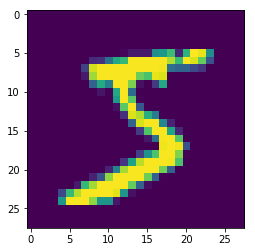

In [6]:
#@title
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#@title
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#@title
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
#@title
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
#@title
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
#@title
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Adding a Prepocess Step for Image normalization

In [0]:
from keras.preprocessing.image import ImageDataGenerator
image_norm = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
image_norm.fit(X_train)
train_iterator = image_norm.flow(X_train,Y_train,batch_size = 64)
test_iterator = image_norm.flow(X_test,Y_test,batch_size = 64)

FOURTH ITERATION FROM ASSIGNMENT4 WITH CHANGES - version2
---
1. Image Normalization
2. L2 regularization
3. Activation after BN
4. Saving the best model

---



In [15]:
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler,ModelCheckpoint
from keras import regularizers


model2 = Sequential()

model2.add(Convolution2D(10, 3, 3, input_shape=(28,28,1),use_bias = False,kernel_regularizer=regularizers.l2(0.0001))) #26
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Convolution2D(18, 3,use_bias = False,kernel_regularizer=regularizers.l2(0.0001))) #24
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Convolution2D(18, 3,use_bias = False,kernel_regularizer=regularizers.l2(0.0001))) #22
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.15))

model2.add(MaxPooling2D(pool_size=(2, 2))) #11
model2.add(Convolution2D(10,1,use_bias = False,kernel_regularizer=regularizers.l2(0.0001))) #11
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Convolution2D(18, 3,use_bias = False,kernel_regularizer=regularizers.l2(0.0001))) #9
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Convolution2D(18, 3,use_bias = False,kernel_regularizer=regularizers.l2(0.0001))) #7
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.15))


model2.add(Convolution2D(10,1,use_bias = False,kernel_regularizer=regularizers.l2(0.0001)))#7
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Convolution2D(10,7,kernel_regularizer=regularizers.l2(0.0001))) #1




model2.add(Flatten())
model2.add(Activation('softmax'))
model2.summary()


def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model_path = 'model.{epoch:02d}-{val_loss:.2f}.hdf5'
callbacks = [
    LearningRateScheduler(scheduler, verbose=1),
    ModelCheckpoint(model_path,
        monitor='val_acc', 
        save_best_only=True, 
        mode='max',
        verbose=0)
]

model2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])


model2.fit_generator(train_iterator,epochs=40, verbose=1,steps_per_epoch=len(train_iterator),validation_data=test_iterator,validation_steps = len(test_iterator), callbacks=callbacks)
#score = model2.evaluate(X_test, Y_test, verbose=0)
#print(score)

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(28, 28, 1..., use_bias=False, kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        90        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 18)        1620      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 18)        72        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 18)        0         
___________________________

Importing the best fit model

In [0]:
from keras.models import load_model 
final_model = load_model('model.24-0.03.hdf5')

Evaluating the model score

In [19]:
score = final_model.evaluate_generator(test_iterator,steps=len(test_iterator))
print(score)

[0.0336482815310359, 0.9943]


In [106]:
predicted = final_model.predict_generator(test_iterator,steps=len(test_iterator),verbose=1) 
predicted

157/157 [==============================] - 0s 3ms/step


array([[2.3875279e-08, 1.5184404e-06, 4.7798012e-04, ..., 3.5637186e-06,
        2.2748040e-02, 9.5216352e-01],
       [2.8184365e-11, 1.4259697e-12, 1.3260355e-08, ..., 8.2674126e-15,
        9.9999785e-01, 9.9589337e-10],
       [9.9994469e-01, 1.4090588e-06, 3.6844114e-05, ..., 1.2973686e-07,
        1.2071213e-05, 2.0506297e-08],
       ...,
       [9.4811811e-11, 9.3606971e-08, 2.7648948e-09, ..., 1.5396679e-05,
        2.1029898e-07, 9.9972659e-01],
       [1.9223856e-09, 2.1607756e-11, 1.3151443e-05, ..., 6.0330439e-12,
        9.9998605e-01, 2.4453120e-10],
       [1.3134243e-11, 3.8881533e-11, 1.7184590e-13, ..., 4.2043907e-12,
        2.9494824e-08, 1.4286767e-06]], dtype=float32)

In [0]:
actual_predicted = np.rint(predicted)
incorrect_index = np.nonzero(actual_predicted != Y_test)[0][0:24]

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator

# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=2, interp=False,titles = None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        sp.axis('Off')
        plt.imshow(ims[i])


In [0]:
(X_train_original, y_train_original), (X_test_orginal, y_test_orginal) = mnist.load_data()

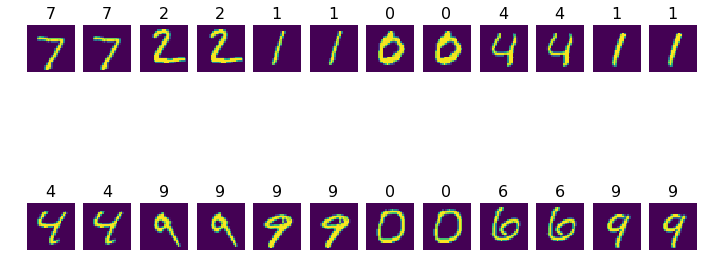

In [102]:
plots(ims = X_test_orginal[incorrect_index],titles=y_test_orginal[incorrect_index])